# Loading packages

In [1]:
#Comment out the other paths and comment in your path
#path = r'C:\Users\heuse\Desktop\SE_Risk_Management-1/' #Daniel Path
#path = '/Users/mandoholzknecht/SE_Risk_Management/' # Path Mando
path = 'C:/Users/Fabio/OneDrive/Dokumente/Uni Innsbruck/WS20/Applied risk mgmt/SE/Heusli/SE_Risk_Management/' # Path Fabio

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.anova as anova
import scipy as sci

from sklearn import metrics

from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve, auc
from sklearn.feature_selection import f_classif
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.stats import chi2_contingency
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import datetime


# Loading the data

Loading the Training dataset + Test dataset

In [2]:
# use the realtive path finding
df_train = pd.read_csv(path + 'Training_Dataset.csv', sep=';', index_col=None)
df_test = pd.read_csv(path + 'Test_Dataset.csv', sep=';', index_col=0)

df_train.head(10)

id  default     legal_form  zip_code  sector  year_inc  count_emp  \
0  C_405        0  GmbH & Co. KG     12359   46730      1900        NaN   
1  C_292        0  GmbH & Co. KG     10719   70101      1976        NaN   
2  C_746        0           GmbH     13353   87100      1962      323.0   
3  C_838        0             AG     12529   68320      1972        1.0   
4  C_495        0    Einzelfirma     12165   47730      1908        NaN   
5  C_494        0           GmbH     13055   68201      1990      415.0   
6  C_300        0           GmbH     10969   68200      1991        2.0   
7  C_453        0           GmbH     16792   78100      1991        NaN   
8  C_924        0           GmbH     13125   86101      1991      283.0   
9  C_976        0           GmbH     12681   71122      1999        NaN   

  type_pl         sales  gross_performance  ...  bonds_payables_lt  \
0     GKV  1.068738e+08       1.068738e+08  ...                NaN   
1     GKV  1.393869e+06       1.407889e+06  ...                NaN   
2     GKV  3.864034e+06       7.597353e+05  ...                NaN   
3     GKV  4.384786e+06       4.405058e+06  ...                NaN   
4     GKV  1.104478e+08       1.104478e+08  ...                NaN   
5     GKV  4.518042e+04       4.518042e+04  ...                NaN   
6     GKV  1.508435e+08       1.479894e+08  ...                NaN   
7     GKV  2.843420e+08       2.843420e+08  ...                NaN   
8     GKV  9.811591e+06       9.681040e+06  ...                NaN   
9     GKV  1.384595e+05       1.384595e+05  ...                NaN   

   total_equity  current_assets  monetary_current_assets         cash  \
0  3.224471e+07    3.783199e+07             1.711147e+07  10297047.50   
1  4.508026e+06    4.669179e+06             9.278377e+05    926383.75   
2  5.164048e+04    2.810119e+07             1.111696e+07   9146283.79   
3  1.182011e+07    8.238474e+06             7.519183e+06   6890565.23   
4  4.547445e+08    3.546565e+07             8.545184e+06   5036615.09   
5  7.953387e+04    8.484770e+04             8.061511e+04     75679.79   
6  6.657375e+08    8.479909e+07             3.142807e+07  11542490.91   
7  2.883814e+09    4.229090e+08             4.312550e+08  21696000.00   
8  2.032968e+07    7.366730e+06             5.421665e+06    322573.88   
9  1.552805e+06    4.966969e+05             4.500943e+04     35726.57   

   trade_receivables_st  trade_receivables_lt  cf_operating  cf_investment  \
0                   NaN                   NaN  6.986094e+06  -1.112342e+06   
1                   NaN                   NaN -4.343980e+06   1.174427e+06   
2             617816.28                   NaN  9.548544e+06  -7.536444e+06   
3             319848.26                   NaN  1.715799e+06  -6.561222e+05   
4             516646.73                   NaN  1.301809e+08  -1.419776e+08   
5                   NaN                   NaN  1.800497e+04  -3.787100e+02   
6             326731.07                8000.0  4.007555e+07  -8.337054e+06   
7             448000.00                   NaN  5.861770e+08  -7.339750e+08   
8             372298.68                   NaN  4.369386e+05  -1.879056e+06   
9                   NaN                   NaN  1.947540e+05   3.318306e+05   

   cf_financing  
0   -7520392.09  
1    1128108.08  
2     -22026.07  
3    -169655.66  
4   12567030.80  
5          0.00  
6  -34594274.52  
7  -95826000.00  
8  -13729379.17  
9    -798859.83  

[10 rows x 40 columns]

# Understanding your data


## Univartiate descriptive anaylsis

The datatype of the variables is important as in dermines how you have to look at the data

In [3]:
catvar = [i for i in list(df_train.columns) if df_train[i].dtype=='O']
catvar # categorial variables

['id', 'legal_form', 'type_pl']

In [4]:
numvar = [i for i in list(df_train.columns) if df_train[i].dtype in ['float64','int64']]
numvar # numberical variables

['default',
 'zip_code',
 'sector',
 'year_inc',
 'count_emp',
 'sales',
 'gross_performance',
 'gross_profit',
 'earn_from_op',
 'fin_result',
 'oth_interest_inc',
 'oth_interest_exp',
 'result_from_ord_bus',
 'total_result',
 'annual_profit',
 'total_assets',
 'total_liabilities_st',
 'total_liabilities_mt',
 'total_liabilities_lt',
 'bank_liabilities_st',
 'bank_liabilities_mt',
 'bank_liabilities_lt',
 'trade_payables_st',
 'trade_payables_mt',
 'trade_payables_lt',
 'bonds_payables_st',
 'bonds_payables_mt',
 'bonds_payables_lt',
 'total_equity',
 'current_assets',
 'monetary_current_assets',
 'cash',
 'trade_receivables_st',
 'trade_receivables_lt',
 'cf_operating',
 'cf_investment',
 'cf_financing']

## Missing values

Overview of missing values in the data

In [5]:
df_train.isnull().sum().sort_values(ascending=False)

bonds_payables_st          669
bonds_payables_lt          669
trade_payables_lt          665
bonds_payables_mt          664
trade_payables_mt          648
trade_receivables_lt       645
bank_liabilities_lt        545
bank_liabilities_mt        483
trade_receivables_st       355
count_emp                  353
bank_liabilities_st        352
trade_payables_st          143
oth_interest_inc           127
oth_interest_exp            62
cash                        32
fin_result                  22
total_equity                21
gross_profit                 7
gross_performance            7
result_from_ord_bus          1
sales                        1
earn_from_op                 1
cf_financing                 1
annual_profit                1
total_assets                 1
cf_investment                1
current_assets               1
cf_operating                 1
sector                       0
zip_code                     0
legal_form                   0
default                      0
year_inc

In [6]:
df_test.isnull().sum().sort_values(ascending=False)

bonds_payables_lt          330
bonds_payables_st          330
trade_payables_lt          330
bonds_payables_mt          329
trade_payables_mt          322
trade_receivables_lt       320
bank_liabilities_lt        250
bank_liabilities_mt        230
count_emp                  179
bank_liabilities_st        172
trade_receivables_st       169
trade_payables_st           65
oth_interest_inc            62
oth_interest_exp            23
cash                        18
total_equity                 9
fin_result                   8
gross_performance            3
gross_profit                 3
cf_investment                1
cf_operating                 1
cf_financing                 1
earn_from_op                 0
year_inc                     0
sector                       0
type_pl                      0
sales                        0
zip_code                     0
total_liabilities_mt         0
result_from_ord_bus          0
total_result                 0
annual_profit                0
total_as

# Variables

Variable coding and transforming variables

In [7]:
# drop companies with to many null columns 
df_train = df_train.loc[df_train["id"] != 'C_620'] 

# get total liabilities
df_train['total_liabilities'] = df_train['total_liabilities_st'] + df_train['total_liabilities_mt'] + df_train['total_liabilities_lt']
df_test['total_liabilities'] = df_test['total_liabilities_st'] + df_test['total_liabilities_mt'] + df_test['total_liabilities_lt']

### Age columns
Transforming the year of incorporation variable to two age variables: one numerical (age_num) one and one categorical one (age_cat). 

\begin{equation*}
Age = Todays\ Year - Year\ Inc.
\end{equation*}

In [8]:
df_train['age_num'] = datetime.datetime.now().year - df_train["year_inc"]
df_train.sort_values(by="age_num",ascending=False).head(5)

#For the test data
df_test['age_num'] = datetime.datetime.now().year - df_test["year_inc"]

As we have some firms which are pretty old (some > 100 years) and two outliers (2020s) we can set their value to the e.g.: 95% quantile as this shouldn't change the meaning of the age variable that much. They are long on the market and it does not really matter if they are long on the market (e.g.: 100 years) or very very long in the business (eg: above 500 years). 

In [9]:
#take a look on the quantiles
quantiles = list()
for i in range(0,100,):
    quantiles.append(df_train["age_num"].quantile(i/100))

age_th = df_train["age_num"].quantile(0.99)

#replace outliers with 99% quantile
df_train.loc[df_train["age_num"] > age_th,"age_num"] = age_th

df_train.sort_values(by="age_num",ascending=False).head(10)

# For the test data
quantiles = list()
for i in range(0,100,):
    quantiles.append(df_test["age_num"].quantile(i/100))

age_th = df_test["age_num"].quantile(0.99)

#replace outliers with 99% quantile
df_test.loc[df_test["age_num"] > age_th,"age_num"] = age_th

df_train["age_quartile"] = pd.qcut(df_train["age_num"],10)
pd.crosstab(df_train["default"],df_train["age_quartile"])

age_quartile  (9.999, 13.0]  (13.0, 16.0]  (16.0, 20.0]  (20.0, 23.0]  \
default                                                                 
0                        69            61            75            78   
1                         5             1             3             6   

age_quartile  (23.0, 25.0]  (25.0, 29.0]  (29.0, 32.0]  (32.0, 42.6]  \
default                                                                
0                       36            67            63            54   
1                        4             0             7             5   

age_quartile  (42.6, 66.0]  (66.0, 158.33]  
default                                     
0                       65              62  
1                        3               4

### Cash coverage ratio

In [10]:
# replace NaNs for cash by monetary current assets
df_train.loc[df_train['cash'].isnull(), 'cash'] = df_train['monetary_current_assets']

# replace NaNs for oth interst exp by balance sheet operations
df_train.loc[df_train['fin_result'].isnull(), 'fin_result'] = df_train['total_result'] - df_train['earn_from_op']
df_train.loc[df_train['oth_interest_exp'].isnull(), 'oth_interest_exp'] = df_train['oth_interest_inc'] - df_train['fin_result']
df_train['oth_interest_exp'] = df_train['oth_interest_exp'].replace(np.nan, df_train['fin_result'])

# cash coverage ratio (interest expenses to be covered by cash)
df_train['cash_coverage'] = df_train['cash']/df_train['oth_interest_exp']
df_train['cash_coverage'] = sci.stats.mstats.winsorize(df_train['cash_coverage'], limits =[0.01, 0.2])

# same procedure for test
df_test.loc[df_test['cash'].isnull(), 'cash'] = df_test['monetary_current_assets']
df_test.loc[df_test['fin_result'].isnull(), 'fin_result'] = df_test['total_result'] - df_test['earn_from_op']
df_test.loc[df_test['oth_interest_exp'].isnull(), 'oth_interest_exp'] = df_test['oth_interest_inc'] - df_test['fin_result']
df_test['oth_interest_exp'] = df_test['oth_interest_exp'].replace(np.nan, df_test['fin_result'])
df_test['cash_coverage'] = df_test['cash']/df_test['oth_interest_exp']
df_test['cash_coverage'] = sci.stats.mstats.winsorize(df_test['cash_coverage'], limits =[0.01, 0.2])

### Profit Margin

\begin{equation*}
Profit\ Margin = \frac{Gross\ Profit}{Sales}
\end{equation*}


In [11]:
# replace NaN's by 0.5% quantil
df_train['gross_profit'] = df_train['gross_profit'].replace(np.nan, np.quantile(df_train['gross_profit'].dropna(),.5))

# calculate margin and winsorize outliers
df_train['profit_margin'] = df_train['gross_profit']/df_train['sales']
df_train['profit_margin'] = sci.stats.mstats.winsorize(df_train['profit_margin'], limits =[0.0, 0.025])

# same procedure for test
df_test['gross_profit'] = df_test['gross_profit'].replace(np.nan, np.quantile(df_test['gross_profit'].dropna(),.5))
df_test['profit_margin'] = df_test['gross_profit']/df_test['sales']
df_test['profit_margin'] = sci.stats.mstats.winsorize(df_test['profit_margin'], limits =[0.0, 0.025])

### Equity Ratio 

\begin{equation*}
Equity\ Ratio = \frac{Total\ Equity}{Total\ Assets}
\end{equation*}


In [12]:
# data cleaning and ratio calculation
np.where(df_train['total_equity'] > 1, df_train['total_equity'], 0)
df_train.loc[df_train.total_equity.isnull(), 'total_equity'] = df_train['total_assets'] - df_train['total_liabilities']
df_train['equity_ratio'] = df_train['total_equity']/df_train['total_assets']

# same procedure for test
np.where(df_test['total_equity'] > 1, df_test['total_equity'], 0)
df_test.loc[df_test.total_equity.isnull(), 'total_equity'] = df_test['total_assets'] - df_test['total_liabilities']
df_test['equity_ratio'] = df_test['total_equity']/df_test['total_assets']

### Working Capital Ratio
liquidity ratios measuring a companies ability to meet its short term dept obligations

\begin{equation*}
Working\ Capital\ Ratio = \frac{Current\ Assets}{Current\ Liabilities}
\end{equation*}


In [13]:
# ratio calculation and winsorizing of outliers
df_train['wc_ratio'] = df_train['current_assets']/df_train['total_liabilities_st']
df_train['wc_ratio'] = sci.stats.mstats.winsorize(df_train['wc_ratio'], limits =[0, 0.1])

# same procedure for test
df_test['wc_ratio'] = df_test['current_assets']/df_test['total_liabilities_st']
df_test['wc_ratio'] = sci.stats.mstats.winsorize(df_test['wc_ratio'], limits =[0, 0.01])

### Return on Assets

\begin{equation*}
ROA = \frac{Annual\ Profit}{Total\ Assets}
\end{equation*}


In [14]:
# ratio calculation and winsorizing of outliers
df_train['roa'] = df_train['result_from_ord_bus']/df_train['total_assets']
df_train['roa'] = sci.stats.mstats.winsorize(df_train['roa'], limits =[0.03, 0.05])

# same procedure for test
df_test['roa'] = df_test['result_from_ord_bus']/df_test['total_assets']
df_test['roa'] = sci.stats.mstats.winsorize(df_test['roa'], limits =[0.03, 0.05])

### Operating Cashflow Ratio 


\begin{equation*}
Operating\ Cashflow\ Ratio = \frac{Operating\ Cashflow}{liabilities_st}
\end{equation*}

In [15]:
# data cleaning, ratio calculation and winsorizing of outliers
ocf_train = np.where(df_train['cf_operating'].between(-1, 1, inclusive=True), 0, df_train['cf_operating'])
df_train['ocf_ratio'] = ocf_train/df_train['total_liabilities_st']
df_train['ocf_ratio'] = sci.stats.mstats.winsorize(df_train['ocf_ratio'], limits =[0.03, 0.05])

# same procedure for test
ocf_test = np.where(df_test['cf_operating'].between(-1, 1, inclusive=True), 0, df_test['cf_operating'])
df_test['ocf_ratio'] = ocf_test/df_test['total_liabilities_st']
df_test['ocf_ratio'] = sci.stats.mstats.winsorize(df_test['ocf_ratio'], limits =[0.03, 0.05])

In [174]:
# # Dept-to-equity kick out
# df_train['debt_to_equity'] = np.where(df_train['total_equity'] > 1, df_train['total_liabilities']/df_train['total_equity'], 0)
# df_train['debt_to_equity'] = sci.stats.mstats.winsorize(df_train['debt_to_equity'], limits =[0.0, 0.02])

# df_test['debt_to_equity'] = np.where(df_test['total_equity'] > 1, df_test['total_liabilities']/df_test['total_equity'], 0)

In [175]:
# # Ebit margin kick out
# df_train['ebit_margin'] = df_train['earn_from_op']/df_train['sales']
# df_train['ebit_margin'] = sci.stats.mstats.winsorize(df_train['ebit_margin'], limits =[0.02, 0.01])

# df_test['ebit_margin'] = df_test['earn_from_op']/df_test['sales']
# df_test['ebit_margin'] = sci.stats.mstats.winsorize(df_test['ebit_margin'], limits =[0.02, 0.01])

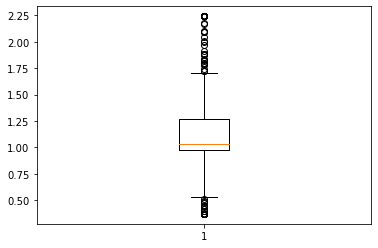

In [240]:
# # neue ratio kick out
# df_train['neu'] = df_train['earn_from_op']/df_train['result_from_ord_bus']
# df_train['neu'] = sci.stats.mstats.winsorize(df_train['neu'], limits =[0.1, 0.1])
# plt.boxplot(df_train['neu'])
# plt.show()

### Boxplots for Ratios

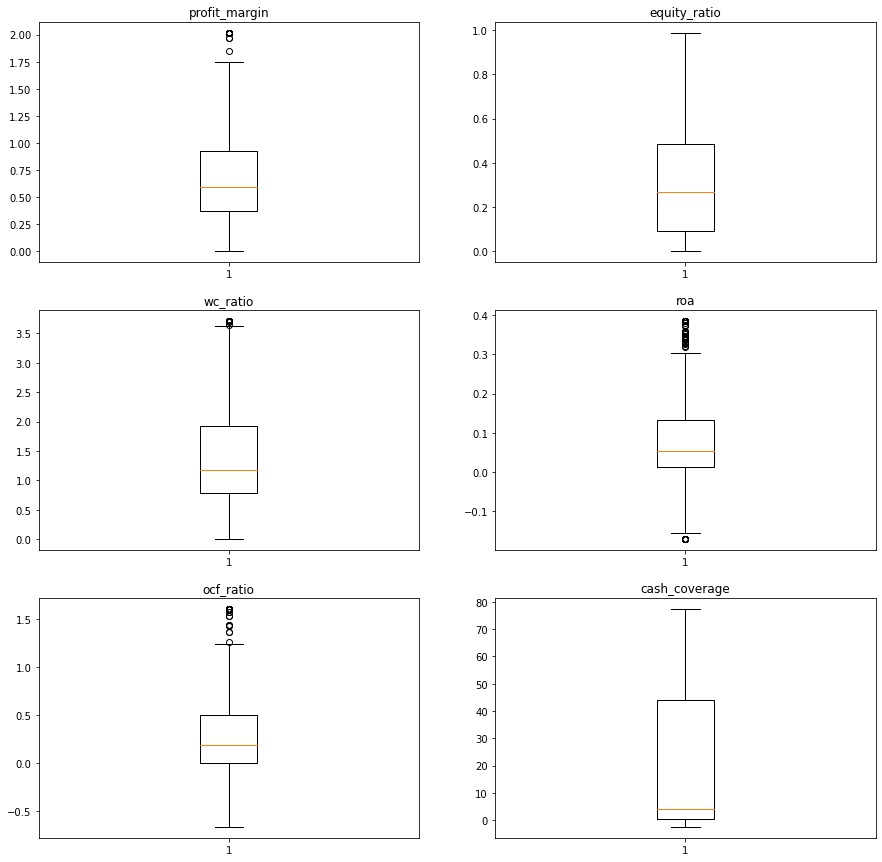

In [16]:
f, ax = plt.subplots(3, 2, figsize=(15, 15))

ax[0,0].boxplot(df_train['profit_margin'])
ax[0,0].set_title('profit_margin')
ax[0,1].boxplot(df_train['equity_ratio'])
ax[0,1].set_title('equity_ratio')
ax[1,0].boxplot(df_train['wc_ratio'])
ax[1,0].set_title('wc_ratio')
ax[1,1].boxplot(df_train['roa'])
ax[1,1].set_title('roa')
ax[2,0].boxplot(df_train['ocf_ratio'])
ax[2,0].set_title('ocf_ratio')
ax[2,1].boxplot(df_train['cash_coverage'])
ax[2,1].set_title('cash_coverage')
plt.show()

## Univariate Analysis

### Univariate Logit Regressions
See the significance of every variable possible in the training set in an univariate setting and where NAs are dropped. We also ordered them according to their p values. Important to note here is the p value is not a KO-criteria for us. Also we do these regressions before data cleansing, which is another important thing to consider. The aim of this is only to see if their is some clear evidence for significant features in the data in the first place.

In [17]:
col_list = df_train.columns[2:]
col_list
dictionary_logit = dict()

for i in range(0,len(col_list)):
    try:
        univ_var = pd.concat((df_train['default'],df_train[col_list[i]]),axis=1)
        y = univ_var["default"]
        X = univ_var.iloc[:,1]
        X = sm.add_constant(X)
        model = sm.Logit(y,X,missing="drop").fit(disp=False,maxiter=100)
        #print(model.summary2()) #comment that out if you don't want to see the regression summary
        pvalue = model.pvalues[1]
        dictionary_logit[col_list[i]] = (pvalue,univ_var.iloc[:,1].isnull().sum())
    except:
        continue

In [18]:
dictionary_logit = pd.DataFrame.from_dict(dictionary_logit,orient="index",columns=['P-Value','NAs']).sort_values(by="P-Value")
dictionary_logit

P-Value  NAs
equity_ratio             0.000102    0
cash_coverage            0.003051    0
wc_ratio                 0.025687    0
cash                     0.031590    0
year_inc                 0.055778    0
total_equity             0.080663    0
roa                      0.095320    0
gross_profit             0.157463    0
profit_margin            0.166417    0
cf_operating             0.242346    1
bank_liabilities_lt      0.245019  544
ocf_ratio                0.258850    0
total_liabilities_lt     0.258998    0
zip_code                 0.260180    0
cf_investment            0.327959    1
total_assets             0.366245    0
result_from_ord_bus      0.421172    0
total_result             0.437999    0
bank_liabilities_mt      0.439548  482
total_liabilities        0.454982    0
oth_interest_exp         0.467391    0
earn_from_op             0.486441    0
total_liabilities_mt     0.509070    0
sales                    0.511471    0
gross_performance        0.580383    6
monetary_current_assets  0.594678    0
annual_profit            0.602697    0
oth_interest_inc         0.621381  126
total_liabilities_st     0.632565    0
current_assets           0.639518    0
bonds_payables_mt        0.699565  663
bank_liabilities_st      0.701179  351
age_num                  0.721892    0
fin_result               0.734789    0
trade_payables_mt        0.768325  647
trade_receivables_st     0.780828  354
sector                   0.840075    0
count_emp                0.903449  353
trade_payables_st        0.990767  142
cf_financing             0.999485    1

Speaking in an univariate context, what we can see here is that no variable shows a very strong significance in the univariate logistic regression with the default variable as dependent variable. Also some variables can be disregarded as their numerical value makes no sense (e.g.: year_inc).  Thus we can argue, that a focus on economic reasoning instead of p-values in the univariate context is a better way to go. 

### Mann-Whitney U Test
Also we perform a Mann-Whitney U Test for all variables to see if there is a difference in those variables between default and non default firms.

In [19]:
col_list

dictionary_mannu = dict()

for i in range(0,len(col_list)):
    try: 
        group_default = df_train[df_train["default"]==1][col_list[i]]
        group_non_default = df_train[df_train["default"]==0][col_list[i]]
        test_stat, pvalue = sci.stats.mannwhitneyu(group_default,group_non_default)
        dictionary_mannu[col_list[i]] = test_stat, pvalue, df_train[col_list[i]].isnull().sum()
    except:
        continue


In [20]:
dictionary_mannu = pd.DataFrame.from_dict(dictionary_mannu,orient="index",
                       columns=['Test statistic','P-Value','NAs']).sort_values(by="P-Value")
dictionary_mannu

Test statistic   P-Value  NAs
cash_coverage                    6714.0  0.000002    0
equity_ratio                     6800.0  0.000004    0
total_equity                     7142.0  0.000015    0
cash                             7196.0  0.000018    0
trade_receivables_lt             8295.0  0.000735  644
trade_payables_lt                8433.0  0.001102  664
bonds_payables_lt                8470.0  0.001226  668
bonds_payables_st                8470.0  0.001226  668
monetary_current_assets          8691.0  0.002271    0
bonds_payables_mt                8853.0  0.003492  663
result_from_ord_bus              8910.0  0.004045    0
total_result                     8979.0  0.004819    0
trade_payables_mt                9055.0  0.005822  647
cf_operating                     9085.0  0.006266    1
sales                            9176.0  0.007802    0
bank_liabilities_st              9216.0  0.008576  351
gross_performance                9239.0  0.009051    6
wc_ratio                         9258.0  0.009431    0
gross_profit                     9325.0  0.011038    0
total_assets                     9396.0  0.012953    0
earn_from_op                     9443.0  0.014374    0
current_assets                   9640.0  0.021879    0
cf_financing                     9775.5  0.028772    1
count_emp                       10013.5  0.045217  353
cf_investment                   10135.0  0.056123    1
annual_profit                   10207.0  0.063548    0
legal_form                      10591.5  0.064372    0
profit_margin                   10270.0  0.070632    0
bank_liabilities_lt             10291.0  0.073125  544
roa                             10292.0  0.073229    0
total_liabilities               10309.0  0.075313    0
ocf_ratio                       10409.5  0.088437    0
total_liabilities_mt            10540.5  0.095418    0
total_liabilities_st            10491.0  0.100310    0
total_liabilities_lt            10889.0  0.148917    0
zip_code                        10800.5  0.155797    0
trade_receivables_st            10847.0  0.165617  354
fin_result                      11131.0  0.233977    0
age_quartile                    11192.5  0.249445    0
year_inc                        11210.0  0.255359    0
age_num                         11212.5  0.256055    0
type_pl                         11856.0  0.273852    0
oth_interest_exp                11446.0  0.325188    0
bank_liabilities_mt             11543.0  0.355998  482
oth_interest_inc                11557.0  0.360524  126
trade_payables_st               11729.0  0.417546  142
sector                          11774.5  0.432978    0

In [21]:
#merge both results together
summary = pd.concat((dictionary_logit.iloc[:,0],dictionary_mannu.iloc[:,1:]),axis=1,)
summary.columns = ["P-Value Univ. Logit","P-Value MannU","NAs"]
summary

P-Value Univ. Logit  P-Value MannU  NAs
equity_ratio                        0.000102       0.000004    0
cash_coverage                       0.003051       0.000002    0
wc_ratio                            0.025687       0.009431    0
cash                                0.031590       0.000018    0
year_inc                            0.055778       0.255359    0
total_equity                        0.080663       0.000015    0
roa                                 0.095320       0.073229    0
gross_profit                        0.157463       0.011038    0
profit_margin                       0.166417       0.070632    0
cf_operating                        0.242346       0.006266    1
bank_liabilities_lt                 0.245019       0.073125  544
ocf_ratio                           0.258850       0.088437    0
total_liabilities_lt                0.258998       0.148917    0
zip_code                            0.260180       0.155797    0
cf_investment                       0.327959       0.056123    1
total_assets                        0.366245       0.012953    0
result_from_ord_bus                 0.421172       0.004045    0
total_result                        0.437999       0.004819    0
bank_liabilities_mt                 0.439548       0.355998  482
total_liabilities                   0.454982       0.075313    0
oth_interest_exp                    0.467391       0.325188    0
earn_from_op                        0.486441       0.014374    0
total_liabilities_mt                0.509070       0.095418    0
sales                               0.511471       0.007802    0
gross_performance                   0.580383       0.009051    6
monetary_current_assets             0.594678       0.002271    0
annual_profit                       0.602697       0.063548    0
oth_interest_inc                    0.621381       0.360524  126
total_liabilities_st                0.632565       0.100310    0
current_assets                      0.639518       0.021879    0
bonds_payables_mt                   0.699565       0.003492  663
bank_liabilities_st                 0.701179       0.008576  351
age_num                             0.721892       0.256055    0
fin_result                          0.734789       0.233977    0
trade_payables_mt                   0.768325       0.005822  647
trade_receivables_st                0.780828       0.165617  354
sector                              0.840075       0.432978    0
count_emp                           0.903449       0.045217  353
trade_payables_st                   0.990767       0.417546  142
cf_financing                        0.999485       0.028772    1
trade_receivables_lt                     NaN       0.000735  644
trade_payables_lt                        NaN       0.001102  664
bonds_payables_lt                        NaN       0.001226  668
bonds_payables_st                        NaN       0.001226  668
legal_form                               NaN       0.064372    0
age_quartile                             NaN       0.249445    0
type_pl                                  NaN       0.273852    0

### Categorical Variables

In [183]:
catvar = [i for i in list(df_train.columns)[1:] if df_train[i].dtype=='O']

for i in catvar:
    tmp1 = pd.crosstab(df_train['default'], df_train[i]).apply(lambda x: np.round(x/x.sum() * 100,2)).T.sort_values(by = i ,ascending=False)
    tmp2 = pd.crosstab(df_train['default'], df_train[i]).T.rename(columns={False: 'N_False', True: 'N_True'})
    tmp3 = pd.DataFrame(tmp2.apply(sum, axis=1), columns=['N'])
    tmp4 = tmp3.apply(lambda x: np.round(x/x.sum() * 100,2)).rename(columns={'N': 'N_Perc'})
    tmp = tmp1.join(tmp2).join(tmp3).join(tmp4)
    print('====================================================')
    print('Variable: ',i)
    print('---------------------------------------------------')
    print(tmp)
    print()
    del tmp1, tmp2, tmp3, tmp4, tmp

Variable:  legal_form
---------------------------------------------------
                              0      1  N_False  N_True    N  N_Perc
legal_form                                                          
Verein                   100.00   0.00        1       0    1    0.15
Sonst. Gewerbetreibende   88.24  11.76       15       2   17    2.54
OHG                      100.00   0.00        4       0    4    0.60
KG                        80.00  20.00        4       1    5    0.75
GmbH & Co. KG             91.67   8.33       88       8   96   14.37
GmbH                      95.04   4.96      460      24  484   72.46
Genossenschaft           100.00   0.00       15       0   15    2.25
Freiberufler              80.00  20.00        4       1    5    0.75
Einzelfirma               88.89  11.11        8       1    9    1.35
BGB-Gesellschaft         100.00   0.00        4       0    4    0.60
AG                        96.43   3.57       27       1   28    4.19

Variable:  type_pl
---------

# Our Variables of interest
In this section we want to focus on our variables of interest, which are mainly choosen because of economic reasoning. These are:
- Cash Coverage Ratio
- Profit Margin
- Equity Ratio
- Working Capital Ratio
- Return on Assets
- Operating Cashflow Ratio

## Results of both univariate Tests

As already stated before, economic reasoning is our main argument to choose a variable for our regression. Nevertheless it is important to see the results of the univariate tests in the section before.

In [22]:
col_list = ['cash_coverage','profit_margin', 'equity_ratio', 'wc_ratio', 'roa', 'ocf_ratio']
summary.loc[col_list,:]

P-Value Univ. Logit  P-Value MannU  NAs
cash_coverage             0.003051       0.000002    0
profit_margin             0.166417       0.070632    0
equity_ratio              0.000102       0.000004    0
wc_ratio                  0.025687       0.009431    0
roa                       0.095320       0.073229    0
ocf_ratio                 0.258850       0.088437    0

## Visualize differences in our variables of interest between default and non default 

Here we just want to visualize the difference in our variables of interest between default and non default firms in our training dataset.

In [23]:
col_list = ['default','cash_coverage','profit_margin', 'equity_ratio', 'wc_ratio', 'roa', 'ocf_ratio']
df_train[col_list]

default  cash_coverage  profit_margin  equity_ratio  wc_ratio       roa  \
0          0      24.319201       0.361114  7.385670e-01  3.710767  0.180537   
1          0      77.423686       1.104725  3.896983e-01  0.663710  0.095967   
2          0      77.423686       2.012151  9.370190e-04  3.328108  0.001684   
3          0      77.423686       2.012151  5.925318e-01  3.193566  0.030412   
4          0       0.473313       1.135876  4.174963e-01  0.102055  0.040158   
..       ...            ...            ...           ...       ...       ...   
664        0       0.077889       0.506472  1.823358e-01  0.835583 -0.001518   
665        0      58.830851       0.446851  3.418227e-01  1.213142  0.173649   
666        0       0.071810       1.000000 -3.086604e-17  0.041927  0.013497   
667        0       2.219296       1.049012 -1.273479e-16  0.615002  0.063753   
668        0      45.504772       0.258573  4.072948e-02  1.006126  0.191823   

     ocf_ratio  
0     0.949635  
1    -0.617484  
2     1.130863  
3     0.665113  
4     0.374604  
..         ...  
664   0.026441  
665  -0.475269  
666   0.009356  
667   0.220748  
668   0.298800  

[668 rows x 7 columns]

### Age

In [ ]:
sns.boxplot(y="age_num",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["age_num"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="age_num",hue="default",stat="density",common_norm=False);

### Cash

In [ ]:
sns.boxplot(y="cash",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["cash"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x=np.log(df_train["cash"]),hue="default",stat="density",common_norm=False)
plt.title("Log transformed");

### Profit Margin

In [ ]:
sns.boxplot(y="profit_margin",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["profit_margin"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="profit_margin",hue="default",stat="density",common_norm=False);

### Ebit Margin

In [ ]:
sns.boxplot(y="ebit_margin",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["ebit_margin"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="ebit_margin",hue="default",stat="density",common_norm=False);

### Working Capital Ratio

In [ ]:
sns.boxplot(y="wc_ratio",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["wc_ratio"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="wc_ratio",hue="default",stat="density",common_norm=False);

### Operating Cash Flow Ratio

In [ ]:
sns.boxplot(y="ocf_ratio",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["ocf_ratio"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="ocf_ratio",hue="default",stat="density",common_norm=False);

### Equity Ratio 

In [ ]:
sns.boxplot(y="equity_ratio",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["equity_ratio"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="equity_ratio",hue="default",stat="density",common_norm=False);

### Debt-to-Equity Ratio

In [ ]:
sns.boxplot(y="debt_to_equity",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["debt_to_equity"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
data = df_train[df_train["debt_to_equity"] < 50]
sns.displot(data,x="debt_to_equity",hue="default",stat="density",common_norm=False)
plt.title("Only D/E Ratio up to 50");

## Multivariate Analysis - Correlation Matrix/Heatmap

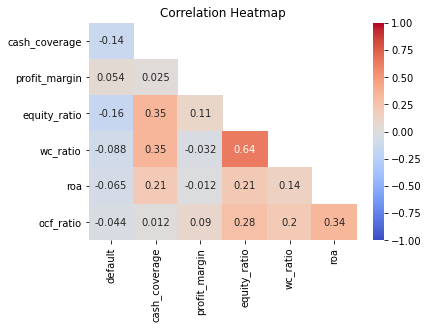

default  cash_coverage  profit_margin  equity_ratio  wc_ratio  \
cash_coverage -0.135894       1.000000       0.024740      0.348565  0.346403   
profit_margin  0.053676       0.024740       1.000000      0.107896 -0.032352   
equity_ratio  -0.160258       0.348565       0.107896      1.000000  0.639378   
wc_ratio      -0.087933       0.346403      -0.032352      0.639378  1.000000   
roa           -0.064645       0.208297      -0.011870      0.214094  0.141487   
ocf_ratio     -0.043737       0.012277       0.090431      0.275093  0.203809   

                    roa  
cash_coverage  0.208297  
profit_margin -0.011870  
equity_ratio   0.214094  
wc_ratio       0.141487  
roa            1.000000  
ocf_ratio      0.343695

In [27]:
data = df_train[col_list]
df_corr = data.corr()
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
mask = mask[1:, :-1]
corr = pd.DataFrame(df_corr.iloc[1:,:-1].copy())

heatmap = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap="coolwarm")
heatmap.set_title('Correlation Heatmap')
plt.show()

corr

## Univariate Ginis of our Variables of interest
Here we want to calculate the Gini coefficients, resulting from a logit model with only one variable of our interest. 

In [28]:
col_list = ['default', 'cash_coverage','profit_margin', 'equity_ratio', 'wc_ratio', 'roa', 'ocf_ratio']
df_train[col_list]

default  cash_coverage  profit_margin  equity_ratio  wc_ratio       roa  \
0          0      24.319201       0.361114  7.385670e-01  3.710767  0.180537   
1          0      77.423686       1.104725  3.896983e-01  0.663710  0.095967   
2          0      77.423686       2.012151  9.370190e-04  3.328108  0.001684   
3          0      77.423686       2.012151  5.925318e-01  3.193566  0.030412   
4          0       0.473313       1.135876  4.174963e-01  0.102055  0.040158   
..       ...            ...            ...           ...       ...       ...   
664        0       0.077889       0.506472  1.823358e-01  0.835583 -0.001518   
665        0      58.830851       0.446851  3.418227e-01  1.213142  0.173649   
666        0       0.071810       1.000000 -3.086604e-17  0.041927  0.013497   
667        0       2.219296       1.049012 -1.273479e-16  0.615002  0.063753   
668        0      45.504772       0.258573  4.072948e-02  1.006126  0.191823   

     ocf_ratio  
0     0.949635  
1    -0.617484  
2     1.130863  
3     0.665113  
4     0.374604  
..         ...  
664   0.026441  
665  -0.475269  
666   0.009356  
667   0.220748  
668   0.298800  

[668 rows x 7 columns]

In [29]:
dictionary_univ_gini = dict()
for var in col_list[1:]:
    X = df_train[var]
    y = df_train["default"]
    X = sm.add_constant(X)

    random_numbers = np.random.randint(0,1000000,1000)

    for i in random_numbers:
        try:
            # Splitting data into training and testing sets.
            train_features, test_features, train_labels, test_labels = train_test_split(X, 
                                                                                y, test_size = 0.33, 
                                                                                random_state = i, 
                                                                                stratify = y)
            # The splited Logit Model
            mdl2split = sm.Logit(train_labels,train_features).fit()
            mdl2split.summary2()

            # Predict the test data
            predictions_split = mdl2split.predict(test_features)
            # Predict the training data
            predictions_split_train = mdl2split.predict(train_features)
            # Calculate the absolute errors
            errors = abs(predictions_split - test_labels)
    
            #AUC & Gini Graph + Calculations of splitted logit

            fpr_split, tpr_split, thresholds_split = metrics.roc_curve(test_labels, predictions_split)
            auc_split = metrics.auc(fpr_split, tpr_split) 

            # Predict the in sample (train) data for comparision
            fpr_split_train, tpr_split_train, thresholds_split_train = metrics.roc_curve(train_labels, predictions_split_train)
            auc_split_train = metrics.auc(fpr_split_train, tpr_split_train)
    
            #Store values in dictionary
            dictionary_univ_gini[i] = round(np.mean(errors), 2),auc_split,2*auc_split-1, auc_split_train, 2*auc_split_train-1,var
        
        except:
            continue

dictionary_univ_gini = pd.DataFrame.from_dict(dictionary_univ_gini,orient="index",
                       columns=['MSE','AUC out sample','Gini out of sample',"AUC in sample","Gini in sample","Variable"])

;

Optimization terminated successfully.
         Current function value: 0.206499
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.206262
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.202697
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.203320
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.207670
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.207984
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.202541
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.205541
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.197571
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.193465
  

Optimization terminated successfully.
         Current function value: 0.203927
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.201097
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.205474
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.207420
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.203563
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.206868
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.202904
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.201434
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.186721
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.190313
 

Optimization terminated successfully.
         Current function value: 0.203516
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.206312
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.201172
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.204117
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.205429
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.203017
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.205313
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.203970
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.205406
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.190608
  

Optimization terminated successfully.
         Current function value: 0.202407
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.202269
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.206804
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.208592
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.201227
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.206741
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.206188
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.204183
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.207808
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.201746
  

Optimization terminated successfully.
         Current function value: 0.202287
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.206125
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.207902
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.200707
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.192589
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.193814
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.204001
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.184850
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.205326
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.206088

Optimization terminated successfully.
         Current function value: 0.201370
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.196557
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.206252
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.205529
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.194350
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.207178
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.194018
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.205979
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.206912
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.201645


         Iterations 8
Optimization terminated successfully.
         Current function value: 0.204735
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.207669
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.198294
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.195034
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.207480
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.200468
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.207211
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.194195
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.200178
         Iterations 9
Optimization terminated successfully.
         Current fun

Optimization terminated successfully.
         Current function value: 0.205709
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.188614
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.201170
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.205526
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.201708
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.203179
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.193070
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.202894
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.203757
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.197044


Optimization terminated successfully.
         Current function value: 0.201515
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.206506
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.207716
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.188272
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.201110
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.200274
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.203781
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.202422
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.206600
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.194610
 

Optimization terminated successfully.
         Current function value: 0.205674
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.207668
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.199694
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.200948
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.205935
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.205766
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.200505
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.207951
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.207618
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.198446
  

Optimization terminated successfully.
         Current function value: 0.206166
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.199758
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.199842
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.204725
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.206266
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.190911
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.194926
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.201668
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.207384
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.207286


Optimization terminated successfully.
         Current function value: 0.208159
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.206966
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.206624
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.200051
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.207144
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.193355
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.202119
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.207404
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.203349
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.207060
 

Optimization terminated successfully.
         Current function value: 0.215429
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213129
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215379
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215575
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213361
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214911
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214001
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213734
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214551
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213725
  

Optimization terminated successfully.
         Current function value: 0.211659
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214892
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215430
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215281
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.210445
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211143
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213502
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215462
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215574
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215482
  

Optimization terminated successfully.
         Current function value: 0.214887
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214832
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215145
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215540
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214781
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212922
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213566
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212100
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215534
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212996
  

Optimization terminated successfully.
         Current function value: 0.213059
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215463
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.210856
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212985
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215068
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215306
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213069
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214321
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215161
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215033
  

Optimization terminated successfully.
         Current function value: 0.212730
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215603
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215111
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215602
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213986
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212989
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215537
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211645
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214738
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214538
  

Optimization terminated successfully.
         Current function value: 0.211112
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214406
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215547
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214928
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212525
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214135
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.210146
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215261
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214879
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215265
  

Optimization terminated successfully.
         Current function value: 0.215008
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215353
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215302
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211208
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213639
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215542
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211778
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212827
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212490
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212894
  

Optimization terminated successfully.
         Current function value: 0.214647
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212616
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214897
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213970
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215493
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215592
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215565
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212555
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215107
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215312
  

Optimization terminated successfully.
         Current function value: 0.214978
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213492
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214717
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.209791
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.207948
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212620
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214087
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213959
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215374
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213782
  

Optimization terminated successfully.
         Current function value: 0.214291
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215354
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212567
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211799
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213383
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214833
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211458
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215210
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.209302
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215408
  

Optimization terminated successfully.
         Current function value: 0.212063
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213049
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211147
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213292
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212677
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214319
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.210926
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214750
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214381
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213986
  

Optimization terminated successfully.
         Current function value: 0.213341
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215597
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215020
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214629
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215143
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214493
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215316
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215611
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213344
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215543
  

Optimization terminated successfully.
         Current function value: 0.199546
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.203567
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.194532
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.203633
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.198967
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.201224
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.205329
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.200161
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.195713
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.204634
  

Optimization terminated successfully.
         Current function value: 0.202734
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.203274
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.199514
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.199246
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.205658
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.199588
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.194051
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.205625
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.192642
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.190640
  

Optimization terminated successfully.
         Current function value: 0.191575
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.197525
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.192625
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.196729
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.199192
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.196273
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.197628
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.192668
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.197147
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.200391
  

Optimization terminated successfully.
         Current function value: 0.201524
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.198786
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.202905
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.198449
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.194750
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.206274
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.197491
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.200783
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.201788
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.205622
  

Optimization terminated successfully.
         Current function value: 0.201427
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.202707
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.198501
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.204007
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.195695
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.200616
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.189717
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.200820
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.199626
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.195358
  

         Current function value: 0.197338
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.204762
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.200248
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.199570
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.202960
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.201739
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.199403
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.204793
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.200903
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.195107
         Iterations 8
Optimization termi

Optimization terminated successfully.
         Current function value: 0.204141
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.199540
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.206084
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.200031
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.204705
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.196254
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.203647
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.192683
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.207494
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.201999
  

Optimization terminated successfully.
         Current function value: 0.193960
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.193746
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.201363
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.204675
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.203874
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.204808
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.201483
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.194174
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.200164
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.197758
  

Optimization terminated successfully.
         Current function value: 0.202419
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.197032
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.198366
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.204948
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.203077
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.204302
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.197280
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.203729
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.201653
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.199212
  

Optimization terminated successfully.
         Current function value: 0.204511
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.199690
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.189105
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.202040
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.191137
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.184539
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.202997
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.191944
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.200746
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.198857
  

Optimization terminated successfully.
         Current function value: 0.195305
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.194060
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.202574
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.195088
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.200370
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.201626
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.202807
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.201145
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.188024
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.198257
  

Optimization terminated successfully.
         Current function value: 0.198608
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.200815
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.205886
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.205456
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.205690
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.204181
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.189700
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.199815
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.198375
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.195843
  

Optimization terminated successfully.
         Current function value: 0.211171
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212284
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.210946
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211230
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211472
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213906
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212365
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.210131
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.208961
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.211910
  

Optimization terminated successfully.
         Current function value: 0.204896
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.210128
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.212163
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.209184
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.205722
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.211184
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212245
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212044
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.210653
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.211211
  

Optimization terminated successfully.
         Current function value: 0.210732
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213320
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.209451
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.207714
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.211463
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212525
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.210813
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212437
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212761
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212331
  

Optimization terminated successfully.
         Current function value: 0.208171
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.213075
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.209724
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.203497
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.211993
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213580
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.208526
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.215032
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214822
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213619
  

Optimization terminated successfully.
         Current function value: 0.211924
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213186
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214320
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211488
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213057
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.208904
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.208323
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.212287
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.210839
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212202
  

Optimization terminated successfully.
         Current function value: 0.210459
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213158
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212023
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.207846
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.214031
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.210295
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.212779
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212949
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.210179
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.209938
  

Optimization terminated successfully.
         Current function value: 0.211916
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211203
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.208877
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.209959
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.207264
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.210816
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.206063
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.209972
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.213923
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214044
  

Optimization terminated successfully.
         Current function value: 0.208138
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.212613
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212891
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212195
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.209415
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.210671
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214106
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212588
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213827
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.210731
  

Optimization terminated successfully.
         Current function value: 0.207435
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.212811
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.204581
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.214016
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212175
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.204834
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.211043
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211073
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.209185
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.211373
  

Optimization terminated successfully.
         Current function value: 0.212139
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.209969
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.211717
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.206960
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.205884
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.211883
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211629
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.208425
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.210944
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213487
  

Optimization terminated successfully.
         Current function value: 0.210024
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.210928
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213821
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212135
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212281
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.210008
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.211930
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212358
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213573
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213948
  

Optimization terminated successfully.
         Current function value: 0.210820
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211060
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.209457
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.212232
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.206629
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.211213
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214213
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214371
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213510
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215458
  

Optimization terminated successfully.
         Current function value: 0.213805
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211793
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214625
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214918
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215055
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211093
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213381
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213489
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213164
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215514
  

Optimization terminated successfully.
         Current function value: 0.215272
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212688
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.210409
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212910
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214252
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215424
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214782
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.210808
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212402
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214434
  

Optimization terminated successfully.
         Current function value: 0.214102
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211015
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214601
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211681
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211799
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214352
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211993
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214961
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211813
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214260
  

Optimization terminated successfully.
         Current function value: 0.213172
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215117
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211695
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212585
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214614
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215183
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213607
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211710
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214538
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212401
  

         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214136
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.210088
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.214455
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214210
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214501
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213000
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212426
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211797
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214869
         Iterations 7
Optimization terminated successfully.
         Current funct

Optimization terminated successfully.
         Current function value: 0.213204
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215254
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211002
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214928
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214832
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213244
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.209824
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.214949
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213807
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213658
  

Optimization terminated successfully.
         Current function value: 0.211732
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213386
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213697
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.209368
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.215606
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214001
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215102
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215042
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.209906
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213977
  

Optimization terminated successfully.
         Current function value: 0.213076
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213747
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214368
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214308
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212249
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213978
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214791
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211835
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.210780
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214373
  

Optimization terminated successfully.
         Current function value: 0.210946
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212442
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.210524
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215231
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.207185
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.214028
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213675
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212106
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213347
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213196
  

Optimization terminated successfully.
         Current function value: 0.214018
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212855
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213253
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215046
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.204243
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.211291
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214924
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214022
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.210174
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213551
  

Optimization terminated successfully.
         Current function value: 0.215475
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213821
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213988
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214402
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212946
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214105
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.209933
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.214233
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213195
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214086
  

Optimization terminated successfully.
         Current function value: 0.214566
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215123
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212840
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215407
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214336
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214391
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214040
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214209
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214711
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213796
  

Optimization terminated successfully.
         Current function value: 0.214734
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215016
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215493
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213043
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212847
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214392
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212626
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215136
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211688
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215520
  

Optimization terminated successfully.
         Current function value: 0.213783
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212656
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214962
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214537
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215490
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215072
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215043
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214296
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214614
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214448
  

Optimization terminated successfully.
         Current function value: 0.215260
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215550
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214196
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214396
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214826
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215580
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215162
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215521
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212165
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214217
  

Optimization terminated successfully.
         Current function value: 0.214851
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215457
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215235
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214925
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212616
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215474
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213762
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214651
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215166
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214491
  

Optimization terminated successfully.
         Current function value: 0.215134
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215117
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214456
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215297
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215297
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214590
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214485
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213959
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214644
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215020
  

Optimization terminated successfully.
         Current function value: 0.215373
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215354
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215331
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.209603
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214579
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214538
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215612
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215261
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214131
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215414
  

Optimization terminated successfully.
         Current function value: 0.215442
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214561
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213780
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215239
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213457
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214314
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214907
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213375
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215095
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211424
  

Optimization terminated successfully.
         Current function value: 0.213714
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213375
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214476
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214534
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212630
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214421
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214857
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214194
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214068
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215062
  

Optimization terminated successfully.
         Current function value: 0.215238
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215521
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214716
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215405
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215560
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215366
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215203
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213017
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213549
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214694
  

Optimization terminated successfully.
         Current function value: 0.211408
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212629
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212940
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211054
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215195
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214709
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215606
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.211612
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215248
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215576
  

Optimization terminated successfully.
         Current function value: 0.215186
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215470
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.215153
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.212646
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214058
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213838
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214006
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213885
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.213598
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.214996
  

''

In [30]:
for i in col_list[1:]:
    print("Mean Gini out of sample with variable:", i, 
          dictionary_univ_gini["Gini out of sample"][dictionary_univ_gini["Variable"]==i].mean())
    

Mean Gini out of sample with variable: cash_coverage 0.4436202650840049
Mean Gini out of sample with variable: profit_margin 0.11118486064314899
Mean Gini out of sample with variable: equity_ratio 0.4337115473729236
Mean Gini out of sample with variable: wc_ratio 0.2298457862470502
Mean Gini out of sample with variable: roa 0.14492899408284
Mean Gini out of sample with variable: ocf_ratio 0.11012758875739641


In [ ]:
# # Gini with only cash and wc ratio
# var = ["cash","wc_ratio"]
# dictionary_logit_two_vars = dict()
# X = df_train[var]
# y = df_train["default"]
# X = sm.add_constant(X)

# random_numbers = np.random.randint(0,1000000,1000)

# for i in random_numbers:
#     try:
#         # Splitting data into training and testing sets.
#         train_features, test_features, train_labels, test_labels = train_test_split(X, 
#                                                                                 y, test_size = 0.33, 
#                                                                                 random_state = i, 
#                                                                                 stratify = y)
#         # The splited Logit Model
#         mdl2split = sm.Logit(train_labels,train_features).fit()
#         mdl2split.summary2()

#         # Predict the test data
#         predictions_split = mdl2split.predict(test_features)
#         # Predict the training data
#         predictions_split_train = mdl2split.predict(train_features)
#         # Calculate the absolute errors
#         errors = abs(predictions_split - test_labels)
    
#         #AUC & Gini Graph + Calculations of splitted logit

#         fpr_split, tpr_split, thresholds_split = metrics.roc_curve(test_labels, predictions_split)
#         auc_split = metrics.auc(fpr_split, tpr_split) 

#         # Predict the in sample (train) data for comparision
#         fpr_split_train, tpr_split_train, thresholds_split_train = metrics.roc_curve(train_labels, predictions_split_train)
#         auc_split_train = metrics.auc(fpr_split_train, tpr_split_train)
    
#         #Store values in dictionary
#         dictionary_logit_two_vars[i] = round(np.mean(errors), 2),auc_split,2*auc_split-1, auc_split_train, 2*auc_split_train-1
        
#     except:
#         continue

# dictionary_logit_two_vars = pd.DataFrame.from_dict(dictionary_logit_two_vars,orient="index",
#                        columns=['MSE','AUC out sample','Gini out of sample',"AUC in sample","Gini in sample"])


In [ ]:
dictionary_logit_two_vars.mean() #gini does not get better

# Our Logit Regression

Die Variablen die funktionieren sind: 'cash_coverage', 'profit_margin', 'equity_ratio', 'wc_ratio', 'roa', 'ocf_ratio'

In [31]:
mdl1 = sm.Logit.from_formula('default ~ equity_ratio + profit_margin + wc_ratio + roa + 1',
                            data=df_train).fit(disp=False, maxiter=100)
print(mdl1.summary2())

                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.084     
Dependent Variable: default          AIC:              277.2423  
Date:               2021-01-11 21:07 BIC:              299.7637  
No. Observations:   668              Log-Likelihood:   -133.62   
Df Model:           4                LL-Null:          -145.83   
Df Residuals:       663              LLR p-value:      6.5693e-05
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Intercept         -2.4558   0.4313 -5.6936 0.0000 -3.3012 -1.6104
equity_ratio      -3.8534   1.0605 -3.6334 0.0003 -5.9320 -1.7748
profit_margin      0.6977   0.4134  1.6878 0.0915 -0.1125  1.5080
wc_ratio           0.0783   0.2082  

In [32]:
y = df_train["default"]
X = df_train[['equity_ratio', 'profit_margin', 'wc_ratio', 'roa']]
X = sm.add_constant(X)


mdl2 = sm.Logit(y,X).fit()
mdl2.summary2()

Optimization terminated successfully.
         Current function value: 0.200032
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.084     
Dependent Variable: default          AIC:              277.2423  
Date:               2021-01-11 21:07 BIC:              299.7637  
No. Observations:   668              Log-Likelihood:   -133.62   
Df Model:           4                LL-Null:          -145.83   
Df Residuals:       663              LLR p-value:      6.5693e-05
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const             -2.4558   0.4313 -5.6936 0.0000 -3.3012 -1.6104
equity_ratio      -3.8534   1.0605 -3.6334 0.0003 -5.9320 -1.7748
profit_margin      0.6977   0.4134  1.6878 0.0915 -0.1125  1.5080
wc_ratio           0.0783   0.2082  0.3761 0.7069 -0.3298  0.4864
roa               -0.9777   1.4859 -0.6580 0.5106 -3.8900  1.9346
=================================================================

"""

In [33]:
# see how our model would have predicted the defaults 
s = pd.concat([df_train["default"],round(mdl1.predict(X)*100,2)],axis=1,)
s.columns = ["default","estimated PD in %"]
s.sort_values(by="estimated PD in %",ascending=False)

default  estimated PD in %
2          0              31.08
544        0              25.58
212        1              24.23
209        0              24.12
481        0              18.29
..       ...                ...
26         0               0.38
234        0               0.37
480        0               0.34
524        0               0.33
7          0               0.27

[668 rows x 2 columns]

In [34]:
s[s["default"] == 1]

default  estimated PD in %
32         1              10.73
43         1              12.29
69         1               9.20
104        1              10.56
114        1              17.89
120        1               5.57
128        1               6.95
139        1               9.73
150        1              13.38
198        1              11.45
212        1              24.23
218        1               6.09
226        1               5.81
236        1              10.73
250        1               4.51
251        1               3.51
296        1               5.03
305        1               8.68
313        1               9.54
341        1              11.07
346        1               5.86
375        1              16.00
389        1              11.65
406        1               9.01
419        1              15.59
427        1              12.55
477        1               3.80
479        1              10.40
495        1               8.36
521        1               9.10
522        1               0.65
543        1               2.96
564        1               6.71
566        1              11.40
568        1               5.29
636        1               4.59
649        1               3.63
662        1               8.06

In [35]:
# Splitting data into training and testing sets.
train_features, test_features, train_labels, test_labels = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)
 
# The splited Logit Model
mdl2split = sm.Logit(train_labels,train_features).fit()
mdl2split.summary2()

# Predict the test data
predictions_split = mdl2split.predict(test_features)
# Predict the training data
predictions_split_train = mdl2split.predict(train_features)

# Calculate the absolute errors
errors = abs(predictions_split - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), '.')

Optimization terminated successfully.
         Current function value: 0.196948
         Iterations 8
Mean Absolute Error: 0.1 .


Out sample: 
AUC (LY):   0.6765873015873016
GINI (LY):  0.35317460317460325


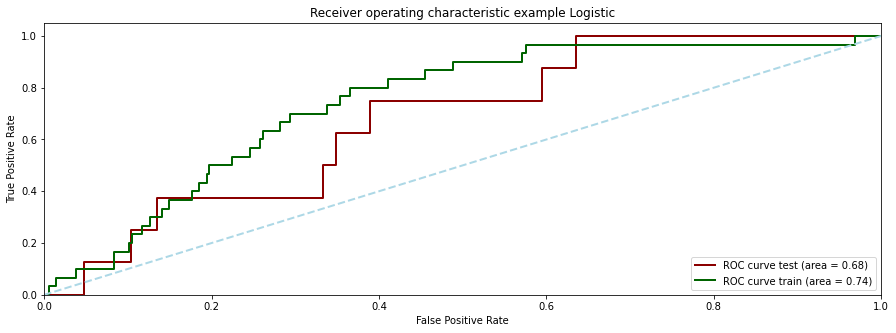

In [36]:
#AUC & Gini Graph + Calculations of splitted logit

fpr_split, tpr_split, thresholds_split = metrics.roc_curve(test_labels, predictions_split)
auc_split = metrics.auc(fpr_split, tpr_split) 

#Predict the in sample (train) data for comparision
fpr_split_train, tpr_split_train, thresholds_split_train = metrics.roc_curve(train_labels, predictions_split_train)
auc_split_train = metrics.auc(fpr_split_train, tpr_split_train)

fig, axes = plt.subplots(figsize=(15,5))
lw = 2
axes = plt.plot(fpr_split, tpr_split, color='darkred',
         lw=lw, label='ROC curve test (area = %0.2f)' % auc_split)
axes = plt.plot(fpr_split_train, tpr_split_train, color='darkgreen',
         lw=lw, label='ROC curve train (area = %0.2f)' % auc_split_train)
axes = plt.plot([0, 1], [0, 1], color='lightblue', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example Logistic')
plt.legend(loc="lower right")

print("Out sample: ")
print('AUC (LY):  ',auc_split)
print('GINI (LY): ', 2*auc_split -1)

In sample: 
AUC L1:   0.730701754385965
GINI L1:  0.4614035087719299
AUC L2:   0.730701754385965
GINI L2:  0.4614035087719299
Splitted Logit Regression
Out sample: 
AUC Test Sample:   0.6765873015873016
GINI Test Sample:  0.35317460317460325


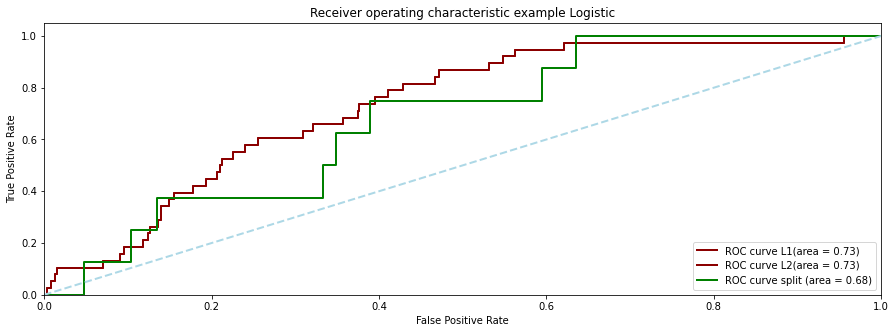

In [37]:
#AUC & Gini Graph + Calculations of old logit regression (red) splitted logit regression (green)
predictions_L1 = mdl1.predict(X)
predictions_L2 = mdl2.predict(X)
#AUC & Gini Graph + Calculations
fpr_L1, tpr_L1, thresholds_L1 = metrics.roc_curve(df_train['default'], predictions_L1)
auc_L1 = metrics.auc(fpr_L1, tpr_L1)

fpr_L2, tpr_L2, thresholds_L2 = metrics.roc_curve(df_train['default'], predictions_L2)
auc_L2 = metrics.auc(fpr_L2, tpr_L2)

fig, axes = plt.subplots(figsize=(15,5))
lw = 2
axes = plt.plot(fpr_L1, tpr_L1, color='darkred',
         lw=lw, label='ROC curve L1(area = %0.2f)' % auc_L1)
axes = plt.plot(fpr_L2, tpr_L2, color='darkred',
         lw=lw, label='ROC curve L2(area = %0.2f)' % auc_L2)
axes = plt.plot(fpr_split, tpr_split, color='green',
         lw=lw, label='ROC curve split (area = %0.2f)' % auc_split)
axes = plt.plot([0, 1], [0, 1], color='lightblue', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example Logistic')
plt.legend(loc="lower right")

print("In sample: ")
print('AUC L1:  ',auc_L1)
print('GINI L1: ', 2*auc_L1 -1)
print('AUC L2:  ',auc_L2)
print('GINI L2: ', 2*auc_L2 -1)
print('Splitted Logit Regression')
print("Out sample: ")
print('AUC Test Sample:  ',auc_split)
print('GINI Test Sample: ', 2*auc_split -1)

Our out of sample Gini here highly depends on the random_state we define in out test and train split. Thus multiple different random states are here simulated. Also the test size here is increased to 0.33 as this will be similiar to the sizes of our train (668 firms) and test (330) firms.

In [ ]:
# Generate random numbers for different states
#np.random.seed(220497)
random_numbers = np.random.randint(0,1000000,10000)
dictionary_random_test = dict()

for i in random_numbers:
    try:
        # Splitting data into training and testing sets.
        train_features, test_features, train_labels, test_labels = train_test_split(X, 
                                                                                y, test_size = 0.33, 
                                                                                random_state = i, 
                                                                                stratify = y)
        # The splited Logit Model
        mdl2split = sm.Logit(train_labels,train_features).fit()
        mdl2split.summary2()

        # Predict the test data
        predictions_split = mdl2split.predict(test_features)
        # Predict the training data
        predictions_split_train = mdl2split.predict(train_features)
        # Calculate the absolute errors
        errors = abs(predictions_split - test_labels)
    
        #AUC & Gini Graph + Calculations of splitted logit

        fpr_split, tpr_split, thresholds_split = metrics.roc_curve(test_labels, predictions_split)
        auc_split = metrics.auc(fpr_split, tpr_split) 

        # Predict the in sample (train) data for comparision
        fpr_split_train, tpr_split_train, thresholds_split_train = metrics.roc_curve(train_labels, predictions_split_train)
        auc_split_train = metrics.auc(fpr_split_train, tpr_split_train)
    
        #Store values in dictionary
        dictionary_random_test[i] = round(np.mean(errors), 2),auc_split,2*auc_split-1, auc_split_train, 2*auc_split_train-1
        
    except:
        continue

dictionary_random_test = pd.DataFrame.from_dict(dictionary_random_test,orient="index",
                       columns=['MSE','AUC out sample','Gini out of sample',"AUC in sample","Gini in sample"])

;

In [ ]:
dictionary_random_test.head()

In [ ]:
dictionary_random_test.describe()

In [ ]:
sns.displot(dictionary_random_test["Gini out of sample"])
plt.title("Distribution of Ginis out of sample");

In [ ]:
sns.displot(dictionary_random_test["Gini in sample"])
plt.title("Distribution of Ginis in sample");

# Random Forest Approach

In [38]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier


# Splitting data into training and testing sets.
train_features, test_features, train_labels, test_labels = train_test_split(X, y, test_size = 0.1, random_state = 42, stratify = y)



# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 2000, 
                            criterion='gini',
                            max_depth=None,
                            min_samples_split = 5,
                            min_samples_leaf = 3,
                            max_features='auto',
                            bootstrap=True,
                            oob_score=True,
                            random_state = 0,
                            verbose=0,
                            n_jobs= 2 ,
                            class_weight = 'balanced_subsample')


# Train the model on training data
rf.fit(train_features, train_labels)
rf.score(train_features, train_labels)

0.9983361064891847

In [39]:
# Use the forest's predict method on the test data
predictions_rf = rf.predict(test_features)
predictions_rf_insample = rf.predict(train_features)

predictions_prob = rf.predict_proba(test_features)[:, 1]
predictions_prob_rf_insample = rf.predict_proba(train_features)[:,1]
# Calculate the absolute errors
errors = abs(predictions_rf - test_labels)


# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), '.')

Mean Absolute Error: 0.07 .


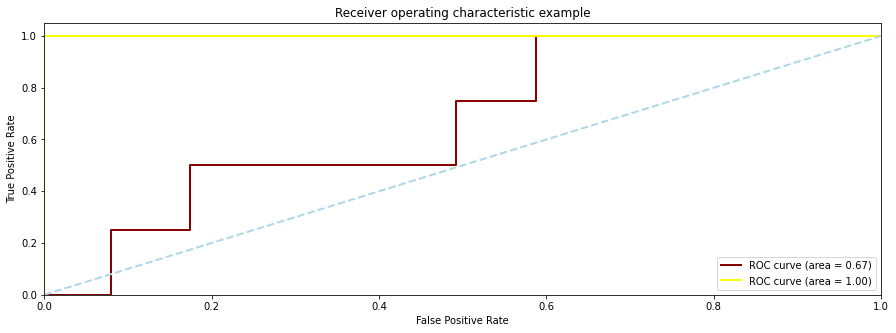

Random Forest Approach
In sample:
AUC :   1.0
GINI:  1.0
Out sample: 
AUC :   0.6666666666666666
GINI:  0.33333333333333326


In [40]:
predicitons_rf_prob = rf.predict_proba(test_features)[:, 1]

fpr, tpr, thresholds = metrics.roc_curve(test_labels, predicitons_rf_prob)
auc = metrics.auc(fpr, tpr)

#In Sample measurements
fpr_rf_is, tpr_rf_is, thresholds_rf_is = metrics.roc_curve(train_labels, predictions_prob_rf_insample)
auc_rf_is = metrics.auc(fpr_rf_is, tpr_rf_is)

fig, axes = plt.subplots(figsize=(15,5))
lw = 2
axes = plt.plot(fpr, tpr, color='darkred',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
axes = plt.plot(fpr_rf_is, tpr_rf_is, color='yellow',
         lw=lw, label='ROC curve (area = %0.2f)' % auc_rf_is)        
axes = plt.plot([0, 1], [0, 1], color='lightblue', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

print("Random Forest Approach")
print("In sample:")
print('AUC :  ',auc_rf_is)
print('GINI: ', 2*auc_rf_is -1)
print("Out sample: ")
print('AUC :  ',auc)
print('GINI: ', 2*auc -1)

In [41]:
weights =np.array([18 if i == 1 else 0.9 for i in train_labels])
# Train the model on training data
rf.fit(train_features, train_labels, sample_weight = weights)

RandomForestClassifier(class_weight='balanced_subsample', min_samples_leaf=3,
                       min_samples_split=5, n_estimators=2000, n_jobs=2,
                       oob_score=True, random_state=0)

# Coming to the Test Sample

In [ ]:
df_test

In [ ]:
X = df_test[['cash_coverage', 'profit_margin', 'equity_ratio', 'wc_ratio', 'roa', 'ocf_ratio']]
#X = sm.add_constant(X) #weiß nicht ob man das mochen soll/ bei den PDs ändert sich nichts

X.loc['C_712','ocf_ratio'] = 0
X.loc['C_712']

In [ ]:
prediction = pd.DataFrame(mdl1.predict(X))
x = round(prediction*100,2)

In [ ]:
x.describe()

In [ ]:
x.sort_values(by=0,ascending=False)

In [ ]:
df_test.loc["C_712"] #der geht nicht

## Random Forest Export

In [ ]:
X = sm.add_constant(X) #weiß nicht ob man das mochen soll/ bei den PDs ändert sich nichts
X_rf = X.copy()
i_ndex = X.index
#X_rf = X.reset_index()
#X_rf = X_rf.set_index('id')
#X_rf = X_rf.drop('id', axis=1)
X_rf.replace([np.inf, -np.inf], np.nan, inplace=True)
#X_rf = np.array(X_rf)

In [ ]:
X_rf.replace(np.nan, 0, inplace=True)
#np.where(np.isnan(X_rf))

In [ ]:
y_RF = pd.DataFrame(rf.predict(X_rf),columns={'Default'},index=i_ndex)
y_RF_prob = pd.DataFrame(rf.predict_proba(X_rf),index=i_ndex)
y_RF_prob = round(y_RF_prob*100,2)

y_RF_prob.sort_values(by=1, ascending=False)

In [ ]:
y_RF.sort_values(by='Default',ascending=False)

In [ ]:
train_RF = pd.concat([y_RF, y_RF_prob], axis=1)
train_RF

 # Export
 the Data as a CSV file for the Upload
  

In [ ]:
train_RF.to_csv("trained_RF-Approach.csv")

In [ ]:
 x.to_csv("trained_Logit-Approach.csv")